In [15]:
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [16]:
folder = '/Users/jug/Repositories/GIT/BobSeg/export/'

stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,0,1)
stack2 = imread(folder+'stack02.tiff')
stack2 = np.swapaxes(stack2,0,1)
stack = np.concatenate([stack1,stack2],axis=1)

seg1 = imread(folder+'seg01.tiff')
seg2 = imread(folder+'seg02.tiff')
seg = np.concatenate([seg1,seg2])

flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,0,1)
flow2 = imread(folder+'flow02.tiff')
flow2 = np.swapaxes(flow2,0,1)
flow = np.concatenate([flow1,flow2],axis=1)

# Create the KymoSpider object

In [17]:
# Parameters are: 
# -- number of legs
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)
ks = KymoSpider(8,80,(175,265),rotation=180)

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

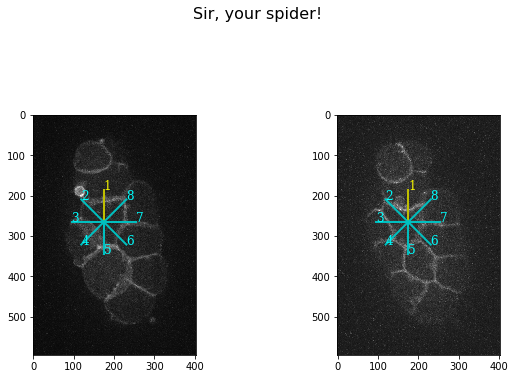

In [18]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[1],flow)

# Compute Kymographs and Plot Data

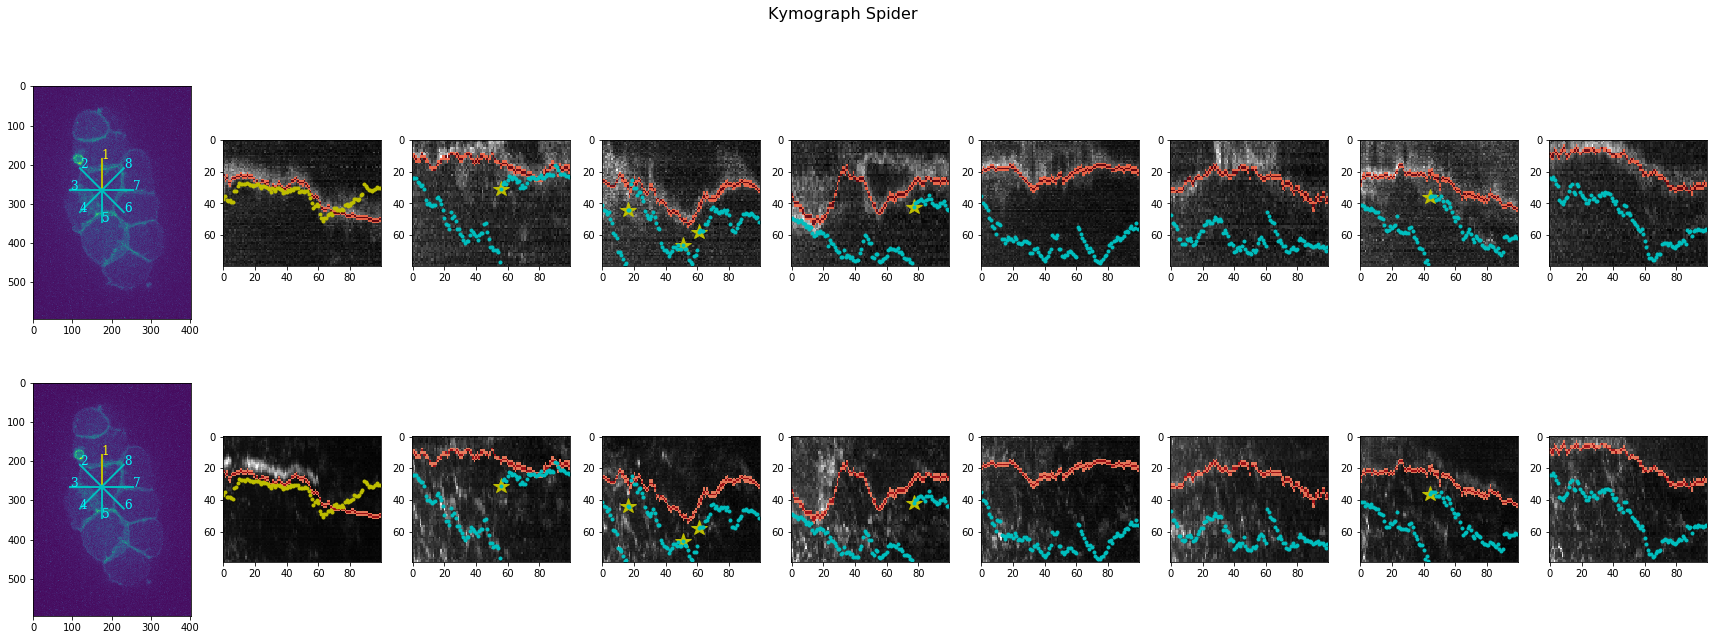

In [19]:
ks.compute(stack[1],stack[0],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

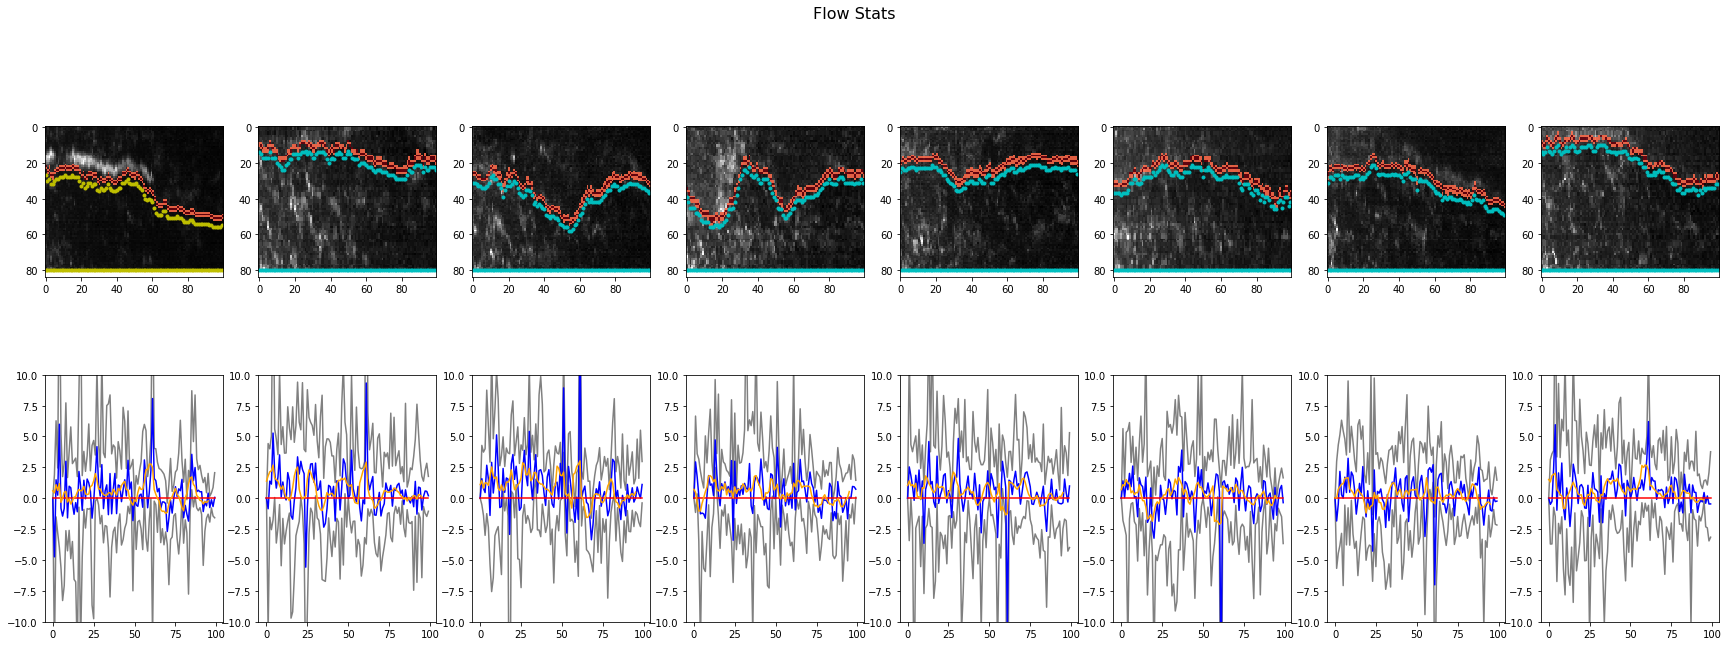

In [20]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=5, length=None)

TypeError: 'int' object has no attribute '__getitem__'

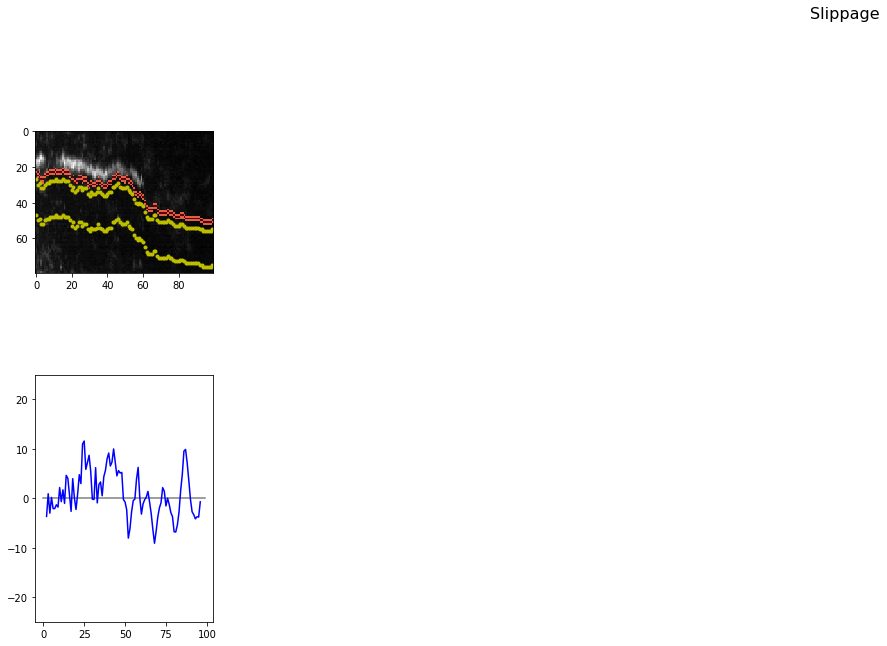

In [31]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=5, length=20)

# Export data to CSV file

In [ ]:
data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing '%s' on %s\n\n" % (filename,str_now))
    for t in range(len(frames)):
        data_file.write("t, %d\n"%t)
        data_file.write("c, %d, %d\n"%(centers[t][0],centers[t][1]))
        data_file.write("r, %d\n"%radii[t])
        polygone = polygones[t][0] # we will only export the first polygone here!
        for p in range(len(polygone)):
            #absolute point coordinates: 
            #  data_file.write("p%d, %d, %d\n"%(p,polygone[p][0],polygone[p][1]))
            data_file.write("p%d, %d, %d\n"%(p,polygone[p][0]-centers[t][0],polygone[p][1]-centers[t][1]))
        data_file.write("\n")